          order_id order_date ship_date       ship_mode    customer_name  \
0     AG-2011-2040 2011-01-01  6/1/2011  Standard Class  Toby Braunhardt   
1    IN-2011-47883 2011-01-01  8/1/2011  Standard Class      Joseph Holt   
2     HU-2011-1220 2011-01-01  5/1/2011    Second Class    Annie Thurman   
3  IT-2011-3647632 2011-01-01  5/1/2011    Second Class     Eugene Moren   
4    IN-2011-47883 2011-01-01  8/1/2011  Standard Class      Joseph Holt   

       segment            state    country  market   region  ...  \
0     Consumer      Constantine    Algeria  Africa   Africa  ...   
1     Consumer  New South Wales  Australia    APAC  Oceania  ...   
2     Consumer         Budapest    Hungary    EMEA     EMEA  ...   
3  Home Office        Stockholm     Sweden      EU    North  ...   
4     Consumer  New South Wales  Australia    APAC  Oceania  ...   

          category sub_category                 product_name  sales  quantity  \
0  Office Supplies      Storage          Tenex Locker

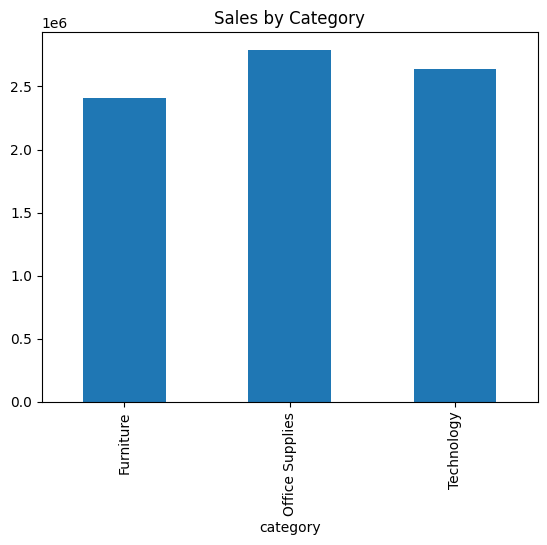

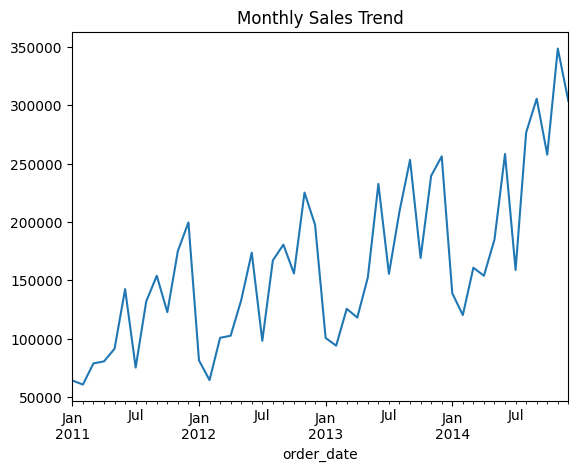

Data stored in SQL database successfully
          category  total_sales
0        Furniture    2406605.0
1  Office Supplies    2790258.0
2       Technology    2638265.0
   year  total_sales
0  2011    1378151.0
1  2012    1681499.0
2  2013    2107021.0
3  2014    2668457.0
Mean Squared Error: 5465.228627073347
File saved for Power BI
File saved successfully


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("SuperStoreOrders.csv")

# Convert sales column to numeric
df["sales"] = pd.to_numeric(df["sales"], errors="coerce")

# Drop missing values
df = df.dropna()

# Convert date column
df["order_date"] = pd.to_datetime(df["order_date"], format="mixed", dayfirst=True)

print(df.head())
print(df.info())
# Total sales
print("Total Sales:", df["sales"].sum())

# Sales by category
sales_by_category = df.groupby("category")["sales"].sum()
print(sales_by_category)

# Graph
sales_by_category.plot(kind="bar")
plt.title("Sales by Category")
plt.show()

# Monthly trend
monthly_sales = df.groupby(df["order_date"].dt.to_period("M"))["sales"].sum()

monthly_sales.plot()
plt.title("Monthly Sales Trend")
plt.show()
import sqlite3

# Create database
conn = sqlite3.connect("sales.db")

# Save dataframe to SQL table
df.to_sql("sales_data", conn, if_exists="replace", index=False)

print("Data stored in SQL database successfully")
query = """
SELECT category, SUM(sales) as total_sales
FROM sales_data
GROUP BY category
"""

result = pd.read_sql_query(query, conn)
print(result)
query2 = """
SELECT year, SUM(sales) as total_sales
FROM sales_data
GROUP BY year
"""

result2 = pd.read_sql_query(query2, conn)
print(result2)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Features and target
X = df[["sales", "quantity", "discount"]]
y = df["profit"]

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
predictions = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)
df.to_csv("cleaned_sales.csv", index=False)
print("File saved for Power BI")
df.to_csv("cleaned_sales.csv", index=False)
print("File saved successfully")


# Retail Sales and Customer Analytics Project

## Objective
To analyze retail sales data, store and query data using SQL, perform predictive analysis using machine learning, and visualize insights through a Power BI dashboard.

## Tools and Technologies Used
- Python (Pandas, Matplotlib, Scikit-learn)
- SQL (SQLite / MySQL)
- Machine Learning (Linear Regression / Classification)
- Power BI
- Jupyter / Google Colab

## Dataset
SuperStore Orders dataset containing transaction-level sales, product, customer, and regional information.

## Steps Performed
1. Loaded and cleaned the dataset using Python.
2. Converted data types and handled missing values.
3. Performed exploratory data analysis and visualizations.
4. Stored cleaned data in an SQL database and executed queries.
5. Built a machine learning model to analyze or predict trends.
6. Created a Power BI dashboard to visualize key metrics and trends.

## Analysis and Results
- Calculated total sales and category-wise sales.
- Identified trends in monthly sales.
- Queried and summarized data using SQL.
- Built visualizations and dashboards for business insights.

## Conclusion
This project demonstrates an end-to-end workflow of data cleaning, analysis, storage, machine learning, and visualization to generate meaningful business insights.
